seed: 3687072371


C:\Users\wjlm2\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\wjlm2\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.024s...
[t-SNE] Computed neighbors for 600 samples in 0.178s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 11835658.779819
[t-SNE] Computed conditional probabilities in 0.068s
[t-SNE] Iteration 50: error = 72.4795532, gradient norm = 0.4951503 (50 iterations in 0.166s)
[t-SNE] Iteration 100: error = 72.8531723, gradient norm = 0.4706424 (50 iterations in 0.155s)
[t-SNE] Iteration 150: error = 72.6273117, gradient norm = 0.4759315 (50 iterations in 0.166s)
[t-SNE] Iteration 200: error = 72.1373978, gradient norm = 0.4940999 (50 iterations in 0.172s)
[t-SNE] Iteration 250: error = 75.9794617, gradient norm = 0.4595480 (50 iterations in 0.176s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.979462
[t-SNE] Iteration 300: error = 1.1724013, gradient norm = 0.0040136 (50 iterations in 0.147s)
[t-SNE] Iteration 350: error = 1.0910289, gradient norm = 0.00

[t-SNE] Iteration 4200: error = 1.0272213, gradient norm = 0.0000511 (50 iterations in 0.104s)
[t-SNE] Iteration 4250: error = 1.0272393, gradient norm = 0.0000314 (50 iterations in 0.112s)
[t-SNE] Iteration 4300: error = 1.0271609, gradient norm = 0.0000343 (50 iterations in 0.110s)
[t-SNE] Iteration 4350: error = 1.0271822, gradient norm = 0.0000314 (50 iterations in 0.112s)
[t-SNE] Iteration 4400: error = 1.0270704, gradient norm = 0.0000397 (50 iterations in 0.107s)
[t-SNE] Iteration 4450: error = 1.0270691, gradient norm = 0.0000316 (50 iterations in 0.110s)
[t-SNE] Iteration 4500: error = 1.0270212, gradient norm = 0.0000782 (50 iterations in 0.105s)
[t-SNE] Iteration 4550: error = 1.0270805, gradient norm = 0.0000374 (50 iterations in 0.109s)
[t-SNE] Iteration 4600: error = 1.0270314, gradient norm = 0.0000341 (50 iterations in 0.099s)
[t-SNE] Iteration 4650: error = 1.0269375, gradient norm = 0.0000443 (50 iterations in 0.116s)
[t-SNE] Iteration 4700: error = 1.0269314, gradien

[t-SNE] Iteration 8600: error = 1.0256332, gradient norm = 0.0000259 (50 iterations in 0.117s)
[t-SNE] Iteration 8650: error = 1.0256670, gradient norm = 0.0000322 (50 iterations in 0.102s)
[t-SNE] Iteration 8700: error = 1.0256917, gradient norm = 0.0000197 (50 iterations in 0.106s)
[t-SNE] Iteration 8750: error = 1.0256588, gradient norm = 0.0000181 (50 iterations in 0.117s)
[t-SNE] Iteration 8750: did not make any progress during the last 300 episodes. Finished.
[t-SNE] KL divergence after 8750 iterations: 1.025659


C:\Users\wjlm2\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


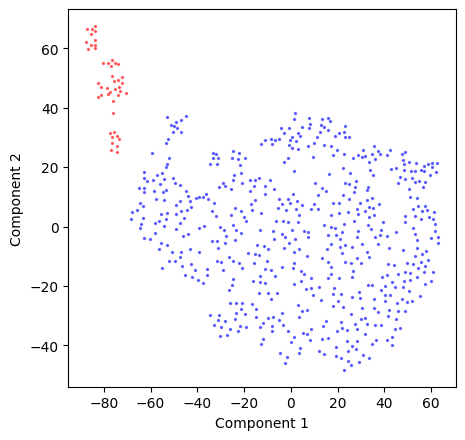

In [1]:
'''code to make the map itself'''

import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, OPTICS, SpectralClustering
import matplotlib.pyplot as plt
import random

#loading data
non_fft_dataset = pd.read_pickle('non_fft_dataset.dat').sample(n=600)

#taking Fast Fourier Transform
fft = np.fft.rfft(non_fft_dataset)

#creating random seed
seed = random.randrange(2**32 - 1)
#seed = 3551836059
print("seed: " + str(seed))

#perplexity = 20, seed: 3551836059
#perplexity = 25, seed = 600348718

#running t-SNE, n_iter should be higher than 'n_termination'
from ipynb.fs.full.config_TSNE import tsne_params
verbose, perplexity, n_iter = tsne_params['verbose'], tsne_params['perplexity'], tsne_params['n_iter']
perplexity = 10
emb = TSNE(verbose = verbose, perplexity = perplexity, n_iter = n_iter, random_state = seed).fit_transform(abs(fft))

clusters = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit_predict(emb)
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

db0 = clusters == 0
db1 = clusters == 1
db2 = clusters == -1
sc = ax.scatter(emb[db0, 0], emb[db0, 1], s=2.0, c='b', alpha=0.5)
sc = ax.scatter(emb[db1, 0], emb[db1, 1], s=2.0, c='r', alpha=0.5)
sc = ax.scatter(emb[db2, 0], emb[db2, 1], s=20.0, c='k', marker='o', alpha=0.5)
plt.show()
#saving dataset, change name at will
np.savetxt("embedding_TSNE.csv",np.vstack((non_fft_dataset.index, emb[:,0], emb[:,1])).T, delimiter = ',',fmt='%s')